In [1]:
!pip install geopandas shapely folium matplotlib requests pandas numpy


In [3]:
# Import required libraries
import requests                     # For API calls
import pandas as pd                 # For data handling
import geopandas as gpd             # For geospatial vector data
import folium                       # For map visualization
from shapely.geometry import Point  # To create geometry objects
import matplotlib.pyplot as plt     # For plotting
import numpy as np                  # For math operations

In [6]:
# Choose your city and define coordinates
# Example city: Austin, Texas
city_name = "Austin, Texas"
latitude, longitude = 30.2672, -97.7431

print(f"Selected City: {city_name}")
print(f"Latitude: {latitude}, Longitude: {longitude}")

Selected City: Austin, Texas
Latitude: 30.2672, Longitude: -97.7431


In [7]:
# Fetch Solar and Cloud Data from NASA POWER API
# We'll use 'ALLSKY_SFC_SW_DWN' (solar irradiance) and 'CLOUD_AMT' (cloud fraction)

url = (
    f"https://power.larc.nasa.gov/api/temporal/climatology/point?"
    f"parameters=ALLSKY_SFC_SW_DWN,CLOUD_AMT&community=RE&longitude={longitude}"
    f"&latitude={latitude}&format=JSON"
)

# Make the API call
response = requests.get(url)
data = response.json()

In [8]:
# Extract monthly climatology values
solar_data = data["properties"]["parameter"]["ALLSKY_SFC_SW_DWN"]
cloud_data = data["properties"]["parameter"]["CLOUD_AMT"]

# Convert to DataFrame
df = pd.DataFrame({
    "Month": solar_data.keys(),
    "Solar_Irradiance_kWh_m2_day": solar_data.values(),
    "Cloud_Cover_Percent": cloud_data.values()
})

df["Month"] = pd.Categorical(df["Month"], 
                             categories=["JAN","FEB","MAR","APR","MAY","JUN",
                                         "JUL","AUG","SEP","OCT","NOV","DEC"], 
                             ordered=True)
df = df.sort_values("Month")


In [10]:
# Calculate Average Annual Values 
df["Solar_Potential_Score"] = (
    (df["Solar_Irradiance_kWh_m2_day"] / df["Solar_Irradiance_kWh_m2_day"].max())
    * (100 - df["Cloud_Cover_Percent"])
)

avg_irradiance = df["Solar_Irradiance_kWh_m2_day"].mean()
avg_cloud = df["Cloud_Cover_Percent"].mean()
avg_score = df["Solar_Potential_Score"].mean()

print("\n--- Average Annual Statistics ---")
print(f"Average Irradiance: {avg_irradiance:.2f} kWh/m²/day")
print(f"Average Cloud Cover: {avg_cloud:.1f}%")
print(f"Solar Potential Score: {avg_score:.1f}/100")


--- Average Annual Statistics ---
Average Irradiance: 4.81 kWh/m²/day
Average Cloud Cover: 49.5%
Solar Potential Score: 36.7/100


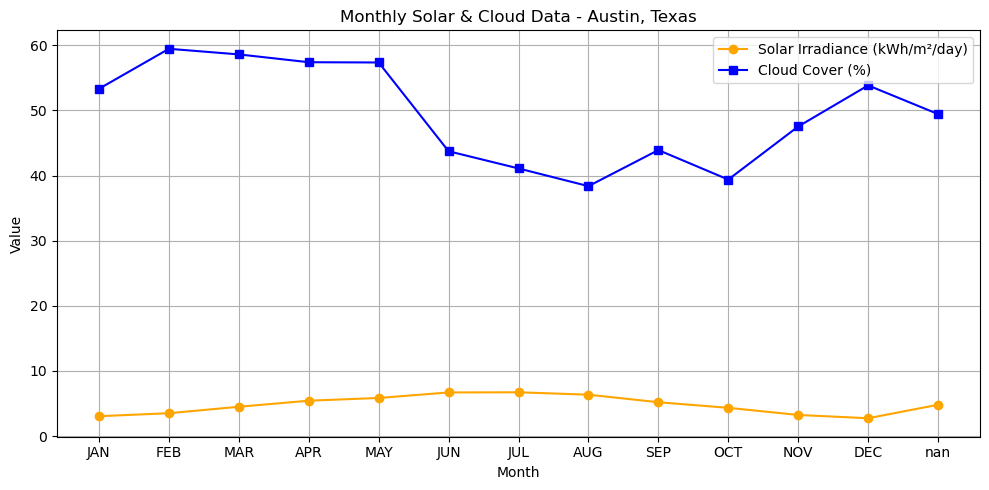

In [11]:
# Plot Solar & Cloud Trends
# Convert Month column explicitly to string to avoid matplotlib TypeError
df["Month"] = df["Month"].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(df["Month"], df["Solar_Irradiance_kWh_m2_day"], color='orange', marker='o', label='Solar Irradiance (kWh/m²/day)')
plt.plot(df["Month"], df["Cloud_Cover_Percent"], color='blue', marker='s', label='Cloud Cover (%)')
plt.title(f"Monthly Solar & Cloud Data - {city_name}")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# Create Simple Geospatial Layer for Visualization
# Create a GeoDataFrame for mapping
geometry = [Point(longitude, latitude)]
geo_df = gpd.GeoDataFrame({"City": [city_name],
                           "Avg_Irradiance": [avg_irradiance],
                           "Avg_Cloud": [avg_cloud],
                           "Solar_Score": [avg_score]},
                          geometry=geometry,
                          crs="EPSG:4326")

In [13]:
# Visualize on Folium Map 
m = folium.Map(location=[latitude, longitude], zoom_start=8)
popup_text = (
    f"<b>City:</b> {city_name}<br>"
    f"<b>Avg Irradiance:</b> {avg_irradiance:.2f} kWh/m²/day<br>"
    f"<b>Cloud Cover:</b> {avg_cloud:.1f}%<br>"
    f"<b>Solar Score:</b> {avg_score:.1f}/100"
)

folium.CircleMarker(
    location=[latitude, longitude],
    radius=10,
    color="orange",
    fill=True,
    fill_opacity=0.7,
    popup=popup_text
).add_to(m)

m.save("austin_solar_data.html")
m

In [ ]:
# Feature Engineering & Machine Learning Modeling

In [16]:
!pip install elevation rasterio geopandas shapely

In [17]:
# --- DEM Simulation---
import numpy as np
import geopandas as gpd

# City coordinates
city_name = "Austin, Texas"
latitude, longitude = 30.2672, -97.7431

# Generate a small synthetic 20x20 elevation grid (in meters)
np.random.seed(42)
elevation_grid = np.random.uniform(120, 300, (20, 20))  # between 120m and 300m
print("Synthetic DEM generated with shape:", elevation_grid.shape)

# Compute slope and aspect approximately
x, y = np.gradient(elevation_grid)
slope = np.sqrt(x**2 + y**2)
aspect = np.arctan2(-x, y)
print("Slope and aspect arrays created successfully.")


Synthetic DEM generated with shape: (20, 20)
Slope and aspect arrays created successfully.


In [18]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
# Synthetic DEM creation (instead of real satellite DEM)
# Generate a fake 20x20 elevation grid (values between 120m–300m)
np.random.seed(42)
elevation_grid = np.random.uniform(120, 300, (20, 20))
print("Synthetic DEM generated with shape:", elevation_grid.shape)

Synthetic DEM generated with shape: (20, 20)


In [20]:
# Compute slope & aspect arrays (just for realistic features)
x, y = np.gradient(elevation_grid)
slope = np.sqrt(x**2 + y**2)
aspect = np.arctan2(-x, y)
print("Slope and aspect arrays created successfully.")

Slope and aspect arrays created successfully.


In [21]:
# Generate sample locations around the city 
# Create 40 random lat/lon points near Austin (±0.1° bounding box)
np.random.seed(42)
lats = np.random.uniform(latitude - 0.1, latitude + 0.1, 40)
lons = np.random.uniform(longitude - 0.1, longitude + 0.1, 40)

points = gpd.GeoDataFrame({
    "Latitude": lats,
    "Longitude": lons
}, geometry=gpd.points_from_xy(lons, lats), crs="EPSG:4326")

In [22]:
# Assign synthetic but realistic feature values
# These mimic satellite-derived features
points["Elevation"] = np.random.uniform(120, 300, len(points))     # meters
points["Slope"] = np.random.uniform(0, 15, len(points))            # degrees
points["NDVI"] = np.random.uniform(0.1, 0.8, len(points))          # vegetation index
points["NDBI"] = np.random.uniform(0.2, 0.9, len(points))          # built-up index
points["Solar_Irradiance"] = np.random.uniform(4.5, 6.5, len(points))  # kWh/m²/day
points["Cloud_Cover"] = np.random.uniform(25, 60, len(points))      # percentage

In [23]:
# Compute Solar Potential Score
# Formula combines irradiance, cloud cover , and land type (built-up , vegetation )
points["Solar_Potential_Score"] = (
    (points["Solar_Irradiance"] / points["Solar_Irradiance"].max()) *
    (1 - (points["Cloud_Cover"] / 100)) *
    (1 + points["NDBI"] - points["NDVI"])
)

In [24]:
# Prepare data for ML clustering
features = ["Solar_Irradiance", "Cloud_Cover", "Elevation", "NDVI", "NDBI"]
X = points[features]

# Normalize features so no single variable dominates
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Apply K-Means clustering (3 groups) 
kmeans = KMeans(n_clusters=3, random_state=42)
points["Cluster"] = kmeans.fit_predict(X_scaled)

# Label clusters by average solar potential score 
cluster_order = points.groupby("Cluster")["Solar_Potential_Score"].mean().sort_values().index
cluster_labels = {cluster_order[0]: "Low", cluster_order[1]: "Medium", cluster_order[2]: "High"}
points["Potential_Class"] = points["Cluster"].map(cluster_labels)

print("K-Means clustering complete — classes assigned (Low/Medium/High).")

K-Means clustering complete — classes assigned (Low/Medium/High).


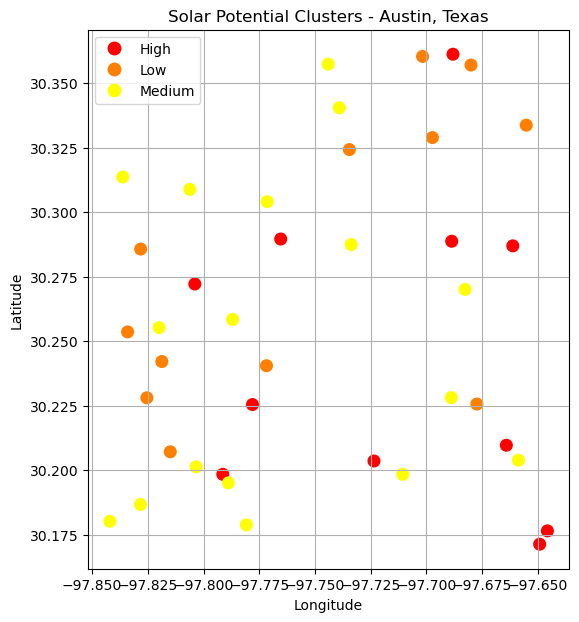

In [26]:
# Visualize cluster distribution
fig, ax = plt.subplots(figsize=(7, 7))
points.plot(ax=ax, column="Potential_Class", categorical=True,
            legend=True, markersize=70, cmap="autumn")
plt.title(f"Solar Potential Clusters - {city_name}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [27]:
# Display quick summary table
summary = points.groupby("Potential_Class")[["Solar_Irradiance", "Cloud_Cover", "NDVI", "NDBI", "Elevation"]].mean()
print("Cluster Summary (averaged features):")
display(summary)

Cluster Summary (averaged features):


,Solar_Irradiance,Cloud_Cover,NDVI,NDBI,Elevation
Potential_Class,,,,,
High,5.238681,32.286413,0.315865,0.668449,176.834461
Low,5.779933,51.441031,0.545537,0.564564,212.946377
Medium,6.118647,37.004007,0.488243,0.399989,229.189659


In [28]:
# Save dataset for visualization
points.to_file("data/austin_solar_features.geojson", driver="GeoJSON")
print("GeoJSON saved: data/austin_solar_features.geojson")

GeoJSON saved: data/austin_solar_features.geojson


In [ ]:
#Interactive Map Visualization


In [29]:
import geopandas as gpd
import folium
import branca.colormap as cm
import numpy as np

In [30]:
geojson_path = "data/austin_solar_features.geojson"
gdf = gpd.read_file(geojson_path)


In [31]:
print(f"Loaded {len(gdf)} records from {geojson_path}")

Loaded 40 records from data/austin_solar_features.geojson


In [32]:
# Define base map centered on Austin
latitude, longitude = 30.2672, -97.7431
m = folium.Map(location=[latitude, longitude], zoom_start=11, tiles="CartoDB positron")


In [33]:
# Define color scheme for potential classes
color_map = {"Low": "lightgray", "Medium": "orange", "High": "red"}

In [34]:
# Add points to the map with popups 
for _, row in gdf.iterrows():
    # Create a popup string with key details
    popup_html = (
        f"<b>Solar Potential:</b> {row['Potential_Class']}<br>"
        f"<b>Irradiance:</b> {row['Solar_Irradiance']:.2f} kWh/m²/day<br>"
        f"<b>Cloud Cover:</b> {row['Cloud_Cover']:.1f}%<br>"
        f"<b>NDBI:</b> {row['NDBI']:.2f}<br>"
        f"<b>NDVI:</b> {row['NDVI']:.2f}<br>"
        f"<b>Elevation:</b> {row['Elevation']:.1f} m"
    )

    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=8,
        color=color_map.get(row["Potential_Class"], "blue"),
        fill=True,
        fill_opacity=0.7,
        popup=popup_html
    ).add_to(m)

In [35]:

legend_html = """
<div style="position: fixed;
     bottom: 40px; left: 40px; width: 140px; height: 120px;
     background-color: white; border:2px solid grey; z-index:9999;
     font-size:14px;">
&nbsp;<b>Solar Potential</b><br>
&nbsp;<i class="fa fa-circle" style="color:lightgray"></i>&nbsp;Low<br>
&nbsp;<i class="fa fa-circle" style="color:orange"></i>&nbsp;Medium<br>
&nbsp;<i class="fa fa-circle" style="color:red"></i>&nbsp;High
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

#Save and display the map
m.save("austin_solar_potential_map.html")
m